In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

In [4]:
df= pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.dropna(inplace=True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


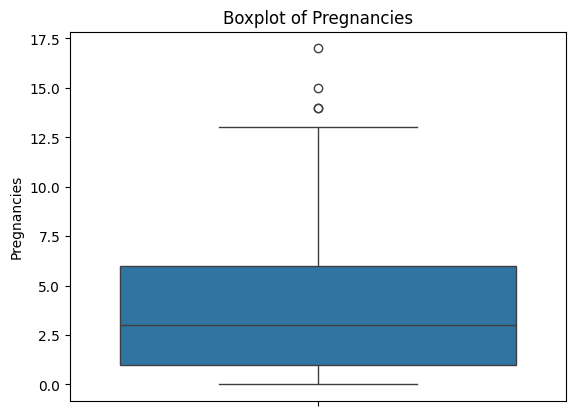

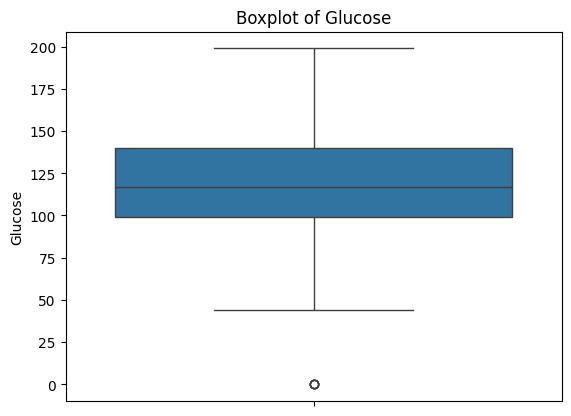

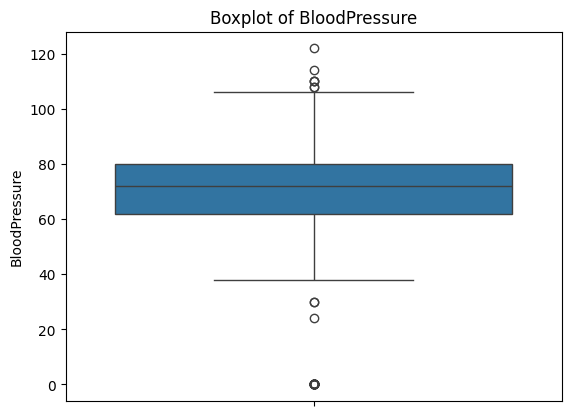

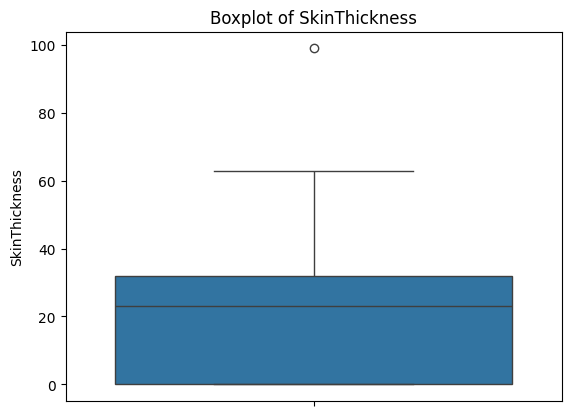

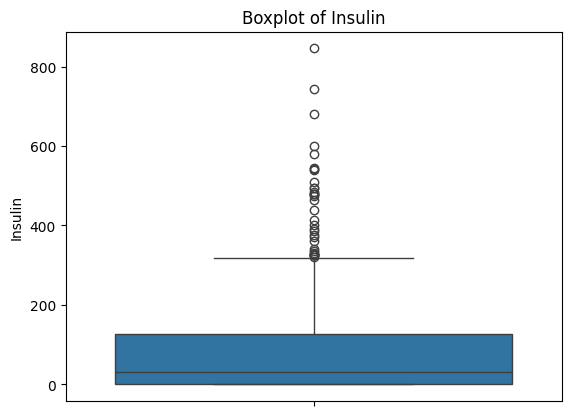

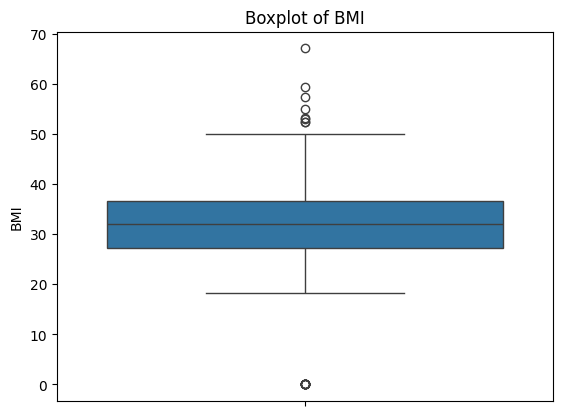

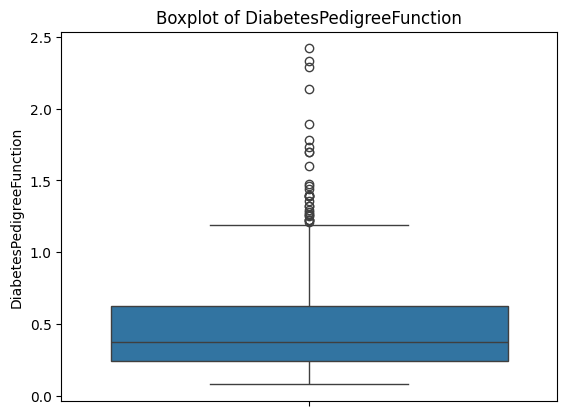

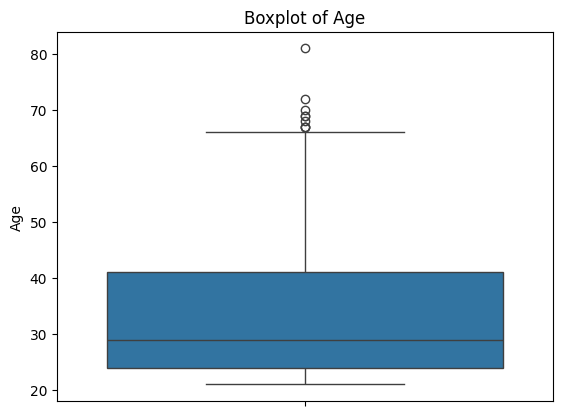

In [7]:
for column in df.columns:
  if column != 'Outcome':
    plt.figure()
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [8]:
df = df[df['SkinThickness'] < 90]
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


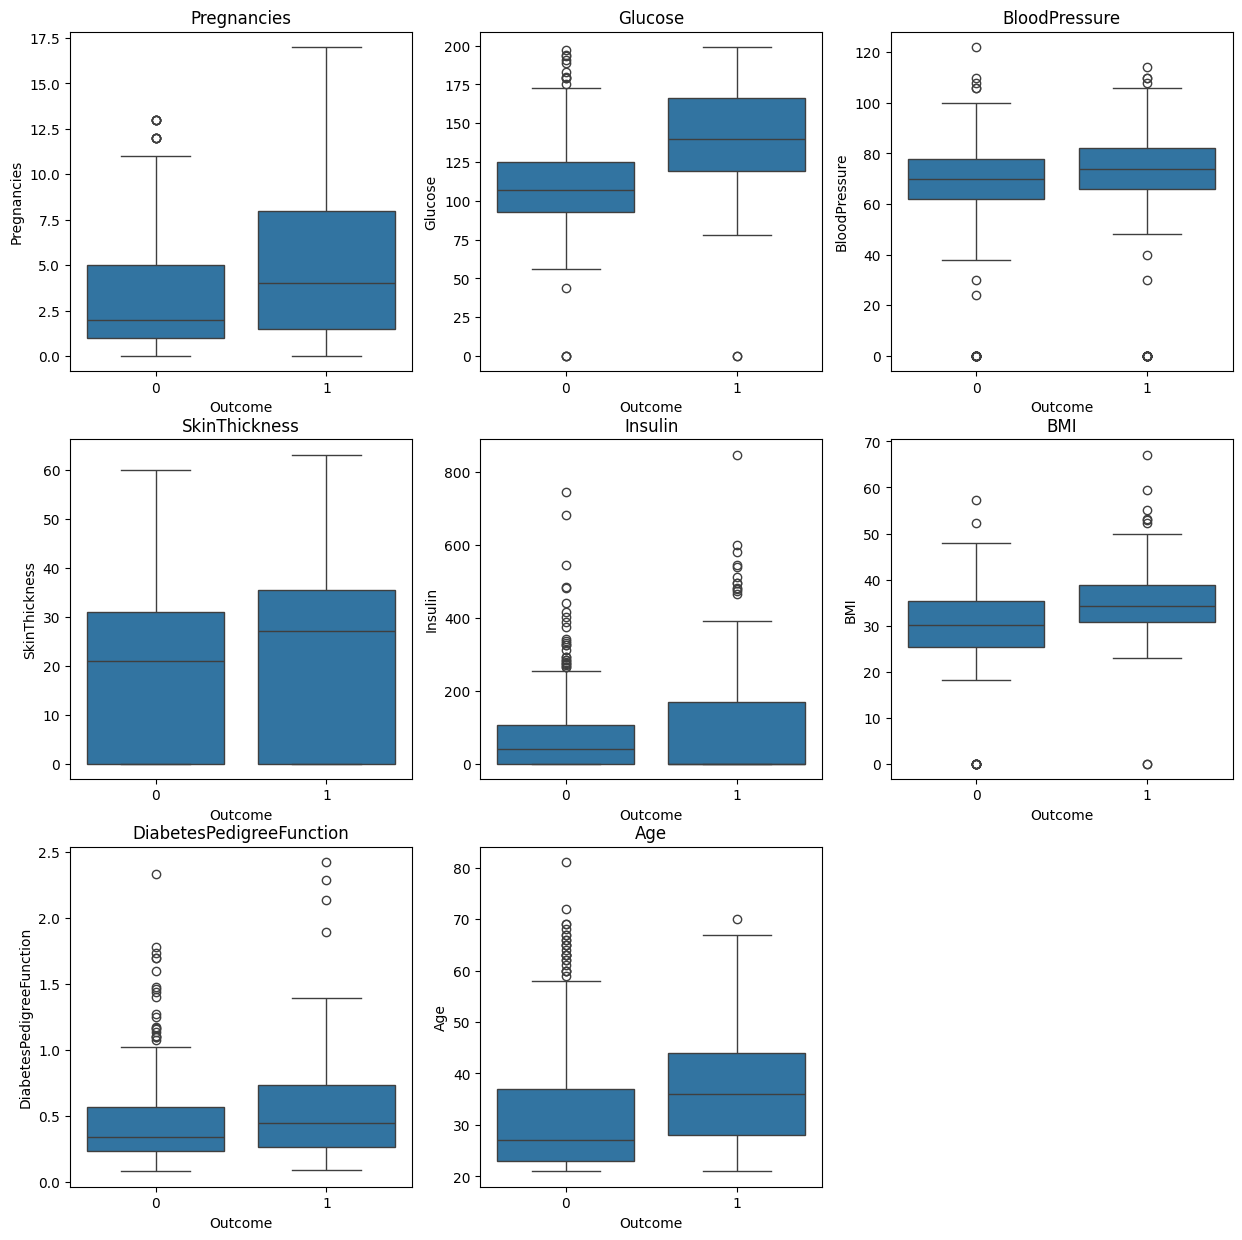

In [9]:
clist = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
fig = plt.figure(figsize=(15, 15))

for i in range(len(clist)):
  column = clist[i]
  sub = fig.add_subplot(3,3,i+1)
  sns.boxplot(x='Outcome', y=column, data=df)
  sub.set_title(column)
plt.show()

In [10]:
x = df.loc[:, df.columns != 'Outcome']
y = df.loc[:, df.columns == 'Outcome']

fScore = SelectKBest(score_func=f_classif, k='all')
fScore.fit(x, y)
np.set_printoptions(suppress = True)
print(fScore.scores_)
print(fScore.pvalues_)

[ 40.1050133  210.61098507   3.25238899   3.46368805  13.56233147
  71.553343    23.74619592  44.79851312]
[0.         0.         0.07171277 0.06311366 0.00024701 0.
 0.00000134 0.        ]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
new_df = df.drop(['BloodPressure', 'SkinThickness'], axis=1)
new_df

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,0,33.6,0.627,50,1
1,1,85,0,26.6,0.351,31,0
2,8,183,0,23.3,0.672,32,1
3,1,89,94,28.1,0.167,21,0
4,0,137,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...
763,10,101,180,32.9,0.171,63,0
764,2,122,0,36.8,0.340,27,0
765,5,121,112,26.2,0.245,30,0
766,1,126,0,30.1,0.349,47,1


In [12]:
x = new_df.loc[:, new_df.columns != 'Outcome']
y = new_df.loc[:, new_df.columns == 'Outcome']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

model = LogisticRegression()
model.fit(x_train, y_train)
A_test = model.predict(x_test)
accuracy_score(y_test, A_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7922077922077922

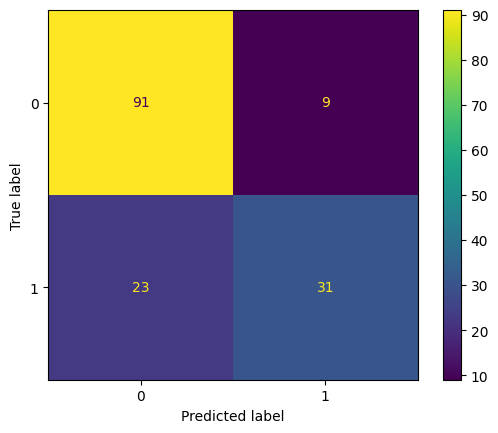

In [13]:
confusion_matrix = ConfusionMatrixDisplay.from_estimator(model, x_test, y_test)
plt.show()

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train.values.ravel())

A_test = model.predict(x_test)
accuracy_score(y_test, A_test)

0.7597402597402597

In [15]:
from sklearn.model_selection import cross_val_score

k_values = []
accuracy_values = []

for k in range(1, 20):
  if k % 3 != 0:
    k_values.append(k)
    model = KNeighborsClassifier(n_neighbors=k)
    cv_score = cross_val_score(model, x, y.values.ravel(), cv=5, scoring='accuracy')
    accuracy_values.append(cv_score.mean())

df_k_scores = pd.DataFrame(data=np.c_[k_values, accuracy_values], columns=['k', 'accuracy'])
print(df_k_scores)

       k  accuracy
0    1.0  0.648018
1    2.0  0.704049
2    4.0  0.715814
3    5.0  0.726271
4    7.0  0.741940
5    8.0  0.734097
6   10.0  0.731517
7   11.0  0.736729
8   13.0  0.740633
9   14.0  0.737985
10  16.0  0.728877
11  17.0  0.732782
12  19.0  0.731500
